In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1,3.0,1.0,NaN
1,5.0,4.0,4.0,5.0,7.0,10,3.0,NaN,1.0
2,3.0,1.0,1.0,1.0,2.0,2,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1,2.0,1.0,1.0
679,2.0,1.0,1.0,1.0,2.0,1,3.0,1.0,1.0
680,5.0,10.0,10.0,10.0,4.0,10,5.0,6.0,3.0
681,1.0,1.0,1.0,3.0,NaN,1,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	48
float64		column 2	16
float64		column 3	32
float64		column 4	50
float64		column 5	16
int64		column 6	0
float64		column 7	66
float64		column 8	32
float64		column 9	32


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,635.000000,667.000000,651.000000,633.000000,667.000000,683.000000,617.000000,651.000000,651.000000
mean,4.436220,3.137931,3.213518,2.748815,3.229385,3.544656,3.380875,2.847926,1.623656
std,2.789165,3.063225,2.982854,2.805133,2.204930,3.643857,2.371877,3.038710,1.768439
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,3.000000,4.000000,6.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

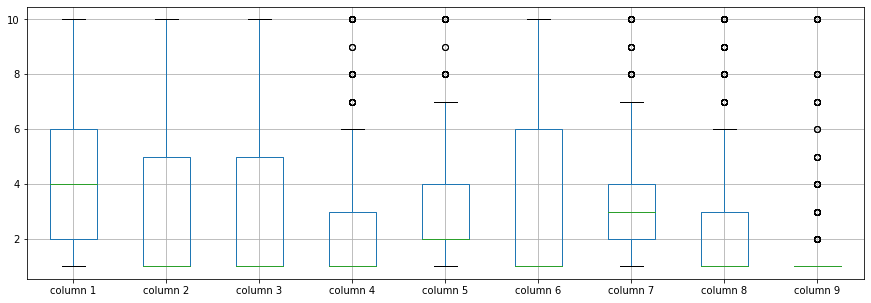

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.436220
column 2    3.137931
column 3    3.213518
column 4    2.748815
column 5    3.229385
column 6    3.544656
column 7    3.380875
column 8    2.847926
column 9    1.623656
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.636155,0.650777,0.482851,0.507915,0.585990,0.552952,0.537548,0.358655
column 2,0.636155,1.000000,0.903899,0.698809,0.751203,0.690142,0.744262,0.715455,0.465026
column 3,0.650777,0.903899,1.000000,0.689811,0.717393,0.701359,0.723790,0.715021,0.445478
column 4,0.482851,0.698809,0.689811,1.000000,0.583000,0.668210,0.653385,0.589585,0.427346
column 5,0.507915,0.751203,0.717393,0.583000,1.000000,0.583154,0.610791,0.629411,0.484131
column 6,0.585990,0.690142,0.701359,0.668210,0.583154,1.000000,0.671055,0.584859,0.342829
column 7,0.552952,0.744262,0.723790,0.653385,0.610791,0.671055,1.000000,0.639899,0.362970
column 8,0.537548,0.715455,0.715021,0.589585,0.629411,0.584859,0.639899,1.000000,0.433267
column 9,0.358655,0.465026,0.445478,0.427346,0.484131,0.342829,0.362970,0.433267,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+23,9+23+23,9+23+23,9+23+23+23+23,9+23+23+23+23+23,9+23+23+23+23+23+23,9+23+23+23+23+23,9+23+23+23+23,9+23+23+23,9+23+23,9+23,9], vae_layer = False, seed = 230)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 34.968630245753694
Epoch: 1 , loss: 35.00825214385986
Epoch: 2 , loss: 34.766482126145135
Epoch: 3 , loss: 34.6724461600894
Epoch: 4 , loss: 34.26193164643787
Epoch: 5 , loss: 33.0088472366333
Epoch: 6 , loss: 31.717723119826545
Epoch: 7 , loss: 30.795883950733003
Epoch: 8 , loss: 30.117032323564803
Epoch: 9 , loss: 29.782968702770415
Epoch: 10 , loss: 29.016390255519322
Epoch: 11 , loss: 28.58736819312686
Epoch: 12 , loss: 28.788842473711288
Epoch: 13 , loss: 28.451672281537736
Epoch: 14 , loss: 28.088192848932174
Epoch: 15 , loss: 27.793895993913925
Epoch: 16 , loss: 27.721198081970215
Epoch: 17 , loss: 27.328038170224143
Epoch: 18 , loss: 27.31557069505964
Epoch: 19 , loss: 27.225795882088796
Epoch: 20 , loss: 27.199075744265603
Epoch: 21 , loss: 27.212329592023575
Epoch: 22 , loss: 26.595067478361585
Epoch: 23 , loss: 27.04483613513765
Epoch: 24 , loss: 26.828970636640275
Epoch: 25 , loss: 26.933105

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,-0.011685
1,0.0,0.0,0.0,0.0,0.000000,0,0.000000,-0.439417,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0,-0.477311,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
678,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000
679,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000
680,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000
681,0.0,0.0,0.0,0.0,-1.588743,0,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(58.60150967350319, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.17475866962712333

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.000000,1,3.000000,1.000000,0.988315
1,5.0,4.0,4.0,5.0,7.000000,10,3.000000,1.560583,1.000000
2,3.0,1.0,1.0,1.0,2.000000,2,3.000000,1.000000,1.000000
3,6.0,8.0,8.0,1.0,3.000000,4,3.000000,7.000000,1.000000
4,4.0,1.0,1.0,3.0,2.000000,1,2.522689,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.000000,1,2.000000,1.000000,1.000000
679,2.0,1.0,1.0,1.0,2.000000,1,3.000000,1.000000,1.000000
680,5.0,10.0,10.0,10.0,4.000000,10,5.000000,6.000000,3.000000
681,1.0,1.0,1.0,3.0,0.411257,1,1.000000,1.000000,1.000000


In [20]:
imputations[-1].to_excel("BCW_NE_5(imp).xlsx", index=False, header=False)